In [213]:
import ambulance_game as abg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [214]:
def build_graph_theoretic_model(lambda_a, lambda_o, mu, num_of_servers, threshold, system_capacity, parking_capacity, nodesize=2000, fontsize=12):

    Q = abg.markov.get_transition_matrix(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, parking_capacity=parking_capacity)
    all_states = abg.markov.build_states(threshold, system_capacity, parking_capacity)
    G = nx.DiGraph() 
    for i, origin_state in enumerate(all_states):
        for j, destination_state in enumerate(all_states):
            if Q[i,j] > 0:
                G.add_edge(origin_state, destination_state, color="blue", weight=Q[i,j])

    plt.figure(figsize=((system_capacity + 1) * 1.5, (parking_capacity + 1) * 1.5))
    pos = {state: [state[1], -state[0]] for state in all_states}
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=nodesize,
        nodelist=[state for state in all_states if state[1] < num_of_servers],
    )
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=nodesize,
        nodelist=[state for state in all_states if state[1] >= num_of_servers],
        node_color="red",
    )
    
    nx.draw_networkx_edges(G, pos, arrowstyle="fancy", arrowsize=60)
    nx.draw_networkx_labels(G, pos, font_size=fontsize)

    plt.axis("off")
    return G


In [215]:
lambda_a=0.1
lambda_o=0.2
mu=0.4
num_of_servers=1 
threshold=3
system_capacity=4
parking_capacity=1

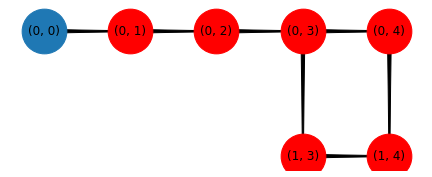

In [216]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, parking_capacity=parking_capacity)

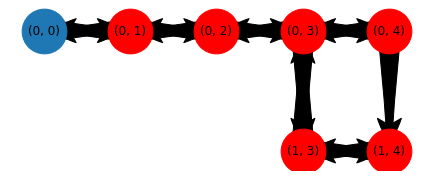

In [217]:
M = build_graph_theoretic_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, parking_capacity=parking_capacity)

In [218]:
M.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (0, 4), (1, 4)))

In [219]:
nx.neighbors(M,(0,0))

# Spanning Trees of UNDIRECTED Graphs

In [220]:
def _expand(G, explored_nodes, explored_edges):
    """
    Expand existing solution by a process akin to BFS.

    Arguments:
    ----------
    G: networkx.Graph() instance
        full graph

    explored_nodes: set of ints
        nodes visited

    explored_edges: set of 2-tuples
        edges visited

    Returns:
    --------
    solutions: list, where each entry in turns contains two sets corresponding to explored_nodes and explored_edges
        all possible expansions of explored_nodes and explored_edges

    """
    frontier_nodes = list()
    frontier_edges = list()
    for v in explored_nodes:
        for u in nx.neighbors(G,v):
            if not (u in explored_nodes):
                frontier_nodes.append(u)
                frontier_edges.append([(u,v), (v,u)])
    return zip([explored_nodes | frozenset([v]) for v in frontier_nodes], [explored_edges | frozenset(e) for e in frontier_edges])

def find_all_spanning_trees(G, root=(0,0)):
    """
    Find all spanning trees of a Graph.

    Arguments:
    ----------
    G: networkx.Graph() instance
        full graph

    Returns:
    ST: list of networkx.Graph() instances
        list of all spanning trees

    """

    # initialise solution
    explored_nodes = frozenset([root])
    explored_edges = frozenset([])
    solutions = [(explored_nodes, explored_edges)]
    # we need to expand solutions number_of_nodes-1 times
    for _ in range(G.number_of_nodes()-1):
        # get all new solutions
        solutions = [_expand(G, nodes, edges) for (nodes, edges) in solutions]
        # flatten nested structure and get unique expansions
        solutions = set([item for sublist in solutions for item in sublist])

    return [nx.from_edgelist(edges) for (nodes, edges) in solutions]

In [221]:
ST = find_all_spanning_trees(M)

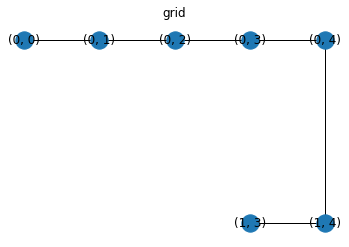

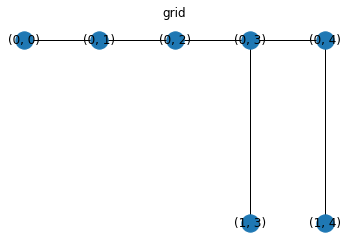

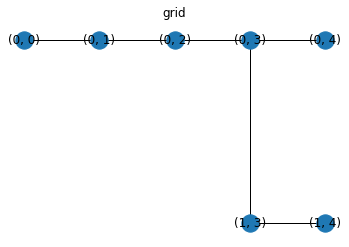

In [222]:
all_states = abg.markov.build_states(threshold, system_capacity, parking_capacity)
pos = {state: [state[1], -state[0]] for state in all_states}
for i in ST:
    fig, ax = plt.subplots(1,1)
    nx.draw_networkx(i, pos=pos)
    plt.axis('off')
    plt.title('grid')
    plt.show()

# Spanning Trees of DIRECTED Graphs

**Number of directed spanning trees rooted at state i** = the determinant of the Laplacian Matrix by removing column i and row i

**Laplacian Matrix**: L = D - A

D = The diagonal matrix where $d_{ii} = degree_{out}(v_i)$

A = Adjacency matrix of the graph

In [245]:
def number_of_spanning_trees_rooted_at_a_state(M, root=0):

    adjacency_matrix = np.zeros([len(M.nodes), len(M.nodes)])
    for row, u in enumerate(M.nodes):
        for col, v in enumerate(M.nodes):
            if (u,v) in M.edges:
                adjacency_matrix[row, col] += 1

    diagonal_out_degree_matrix = np.diag([j for i,j in M.out_degree])
    laplacian = diagonal_out_degree_matrix - adjacency_matrix
    
    return np.linalg.det(np.delete(np.delete(laplacian, root, 0), root, 1))

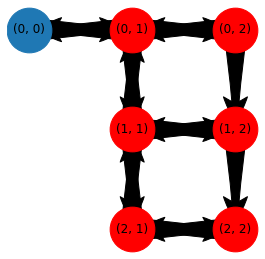

In [246]:
M = build_graph_theoretic_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=1, system_capacity=2, parking_capacity=2)

In [247]:
M.nodes

NodeView(((0, 0), (0, 1), (1, 1), (0, 2), (2, 1), (1, 2), (2, 2)))

In [248]:
number_of_spanning_trees_rooted_at_a_state(M, 6)

14.000000000000004

### Notation
        Ancestors of a vertex: 
        Indices of vertices: the order of the traversal of the depth first search
        Indices of arcs: by indices of their tails
        Back-arc set:
        Non-back-arc set:

### ALGORITHM: Enumerate Directed Spanning Trees(G)
        Step 1: Perform depth-first-search to find T_0.
        Step 2: Assign indices for each vertex based on DFS.
        Step 3: Classify arcs not in T_0 into the back-arc set and the non-back-arc set.
                Sort them in order of their indices.
        Step 4: Call Enum Directed Spanning Trees Iter(T0).

In [ ]:
def enumerate_all_directed_spanning_trees():
    # Perform a depth-first-search
    # Assign indices to each vertex
    

In [233]:
for i in (nx.dfs_tree(M).edges):
    print(i)

((0, 0), (0, 1))
((0, 1), (1, 1))
((0, 1), (0, 2))
((1, 1), (1, 2))


In [226]:
for i in M.edges():
    print(i, "->", i in nx.dfs_tree(M).edges)

((0, 0), (0, 1))->True
((0, 1), (0, 0))->False
((0, 1), (1, 1))->True
((0, 1), (0, 2))->True
((1, 1), (0, 1))->False
((1, 1), (1, 2))->True
((0, 2), (0, 1))->False
((0, 2), (1, 2))->False
((1, 2), (1, 1))->False


In [237]:
nx.ancestors(nx.dfs_tree(M), (1,1))

{(0, 0), (0, 1)}

In [27]:
depth_first_search_tree = nx.dfs_tree(M)

In [29]:
depth_first_search_tree.nodes

NodeView(((0, 0), (0, 1), (1, 1), (0, 2), (1, 2)))

In [31]:
nx.dfs_predecessors(M)

{(0, 1): (0, 0), (1, 1): (0, 1), (1, 2): (1, 1), (0, 2): (0, 1)}

In [32]:
nx.dfs_successors(M)

{(0, 0): [(0, 1)], (0, 1): [(1, 1), (0, 2)], (1, 1): [(1, 2)]}

In [41]:
[i for i in nx.dfs_preorder_nodes(M)]

[(0, 0), (0, 1), (1, 1), (1, 2), (0, 2)]